In [1]:
%pylab inline

from __future__ import print_function
import numpy as np
np.random.seed(1337)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Convolution3D, MaxPooling3D
from keras.utils import np_utils

from copy import deepcopy

import SimpleITK as sitk

Populating the interactive namespace from numpy and matplotlib


Using Theano backend.


In [2]:
mri_sitk = sitk.ReadImage("CNN_testing_data/case_041_ax_space_trial.mha")
mri = sitk.GetArrayFromImage(mri_sitk)

label_sitk = sitk.ReadImage("CNN_testing_data/case_041_ax_space_trial-label.nrrd")
label = sitk.GetArrayFromImage(label_sitk)

#assert mri.shape == label.shape

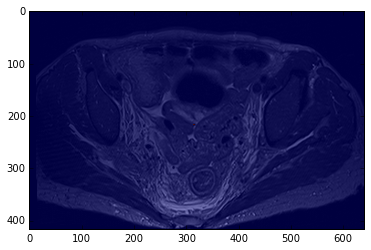

In [3]:
imshow(mri[101,:,:], cmap="gray")
imshow(label[101,:,:], interpolation="nearest", alpha=0.5)

In [4]:
a, b, c = label.shape
print(a,b,c)

112 416 640


In [5]:
batch_size = 1
nb_classes = 2
nb_epoch = 12

train_cases = 1
test_cases = 1

# input image dimensions
img_slices, img_rows, img_cols = mri.shape
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = (2,2,1)
# convolution kernel size
nb_conv = (3,3,3)


X_train = deepcopy(mri)
Y_train = deepcopy(label)
X_test = deepcopy(mri)
Y_test = deepcopy(label)

X_train = X_train.reshape(train_cases, 1, img_slices, img_rows, img_cols)
X_test = X_test.reshape(test_cases, 1, img_slices, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
m,s = np.mean(X_train), np.std(X_train)
X_train -= m
X_train /= s
X_test -= m
X_test /= s
print('X_train shape:', X_train.shape)
print(train_cases, 'train samples')
print(test_cases, 'test samples')

X_train shape: (1, 1, 112, 416, 640)
1 train samples
1 test samples


In [13]:
model = Sequential()

model.add(Convolution3D(nb_filters, nb_conv[0], nb_conv[1], nb_conv[2],
                        border_mode='valid',
                        input_shape=(1, img_slices, img_rows, img_cols)))
model.add(Activation('relu'))

model.add(Convolution3D(nb_filters, nb_conv[0], nb_conv[1], nb_conv[2]))
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[1], nb_pool[2])))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.25))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
#model.add(Activation('softmax', output_))
model.add(Activation('softmax', output_shape=(1, img_slices, img_rows, img_cols)))
model.add(Reshape((img_slices, img_rows, img_cols)))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

MemoryError: 

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)